# Working with Charts

There are many charting applications for python. You can use whichever you prefer.  

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

## Pandas

Pandas provide a wrapper over matplotlib; which you might find easier to start with?
[See Visualizations](http://pandas.pydata.org/pandas-docs/stable/visualization.html)



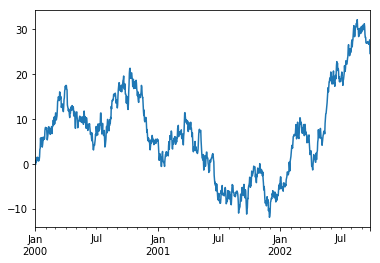

In [2]:
# Create a random timeseries of data
ts = pandas.Series(np.random.randn(1000), index=pandas.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot().get_figure()

## Matplotlib

* is most common, best documented, not very intuitive, can do lots of stuff.
* [here are many examples in the docs](http://matplotlib.org/examples/)

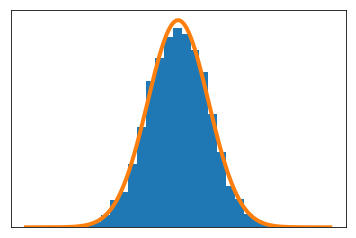

In [3]:
# draw a histogram from random data
X = np.random.randn(10000)
fig, ax = plt.subplots()
ax.hist(X, bins=25, normed=True)
x = np.linspace(-5, 5, 1000)
ax.plot(x, 1 / np.sqrt(2*np.pi) * np.exp(-(x**2)/2), linewidth=4)
ax.set_xticks([])
ax.set_yticks([])
fig

## HighCharts / HighStock

* use the python-highcharts package (https://github.com/kyper-data/python-highcharts)
* there are a zillion options to work through (http://api.highcharts.com/highstock/)
* is what we use for mqdashboard because it enables user interaction (ie: zooming)

In [4]:
from highcharts import Highstock
from highcharts.highstock.highstock_helper import jsonp_loader
H = Highstock()

data_url = 'http://www.highcharts.com/samples/data/jsonp.php?filename=aapl-c.json&callback=?'
H.add_data_from_jsonp(data_url, 'json_data', 'line', 'AAPL', tooltip = {
    'valueDecimals': 2
    }
)

options = {
    'rangeSelector' : {
            'selected' : 1
        },

    'title' : {
        'text' : 'AAPL Stock Price'
    },
}
H.set_dict_options(options)

H